https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [55]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Lidia con las variables categóricas del dataset

In [57]:
df = pd.get_dummies(df)

### 3. Divide en train y test

In [58]:
X = np.array(df.drop('actual', axis=1))
X.shape

(348, 17)

In [59]:
y = np.array(df.actual)
y.shape

(348,)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=400)

In [61]:
y_train.shape

(278,)

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [62]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

In [63]:
y_test.shape

(70,)

### 5. Calcula su MAE
Sin usar sklearn

In [64]:
def mae(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred) / y_test))
mae(y_test,y_pred)

0.08290448206922378

### 6. Calcula su MAPE
Sin usar sklearn

In [65]:
def mape(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape(y_test,y_pred)

8.290448206922377

### 7. Representa el árbol de decision

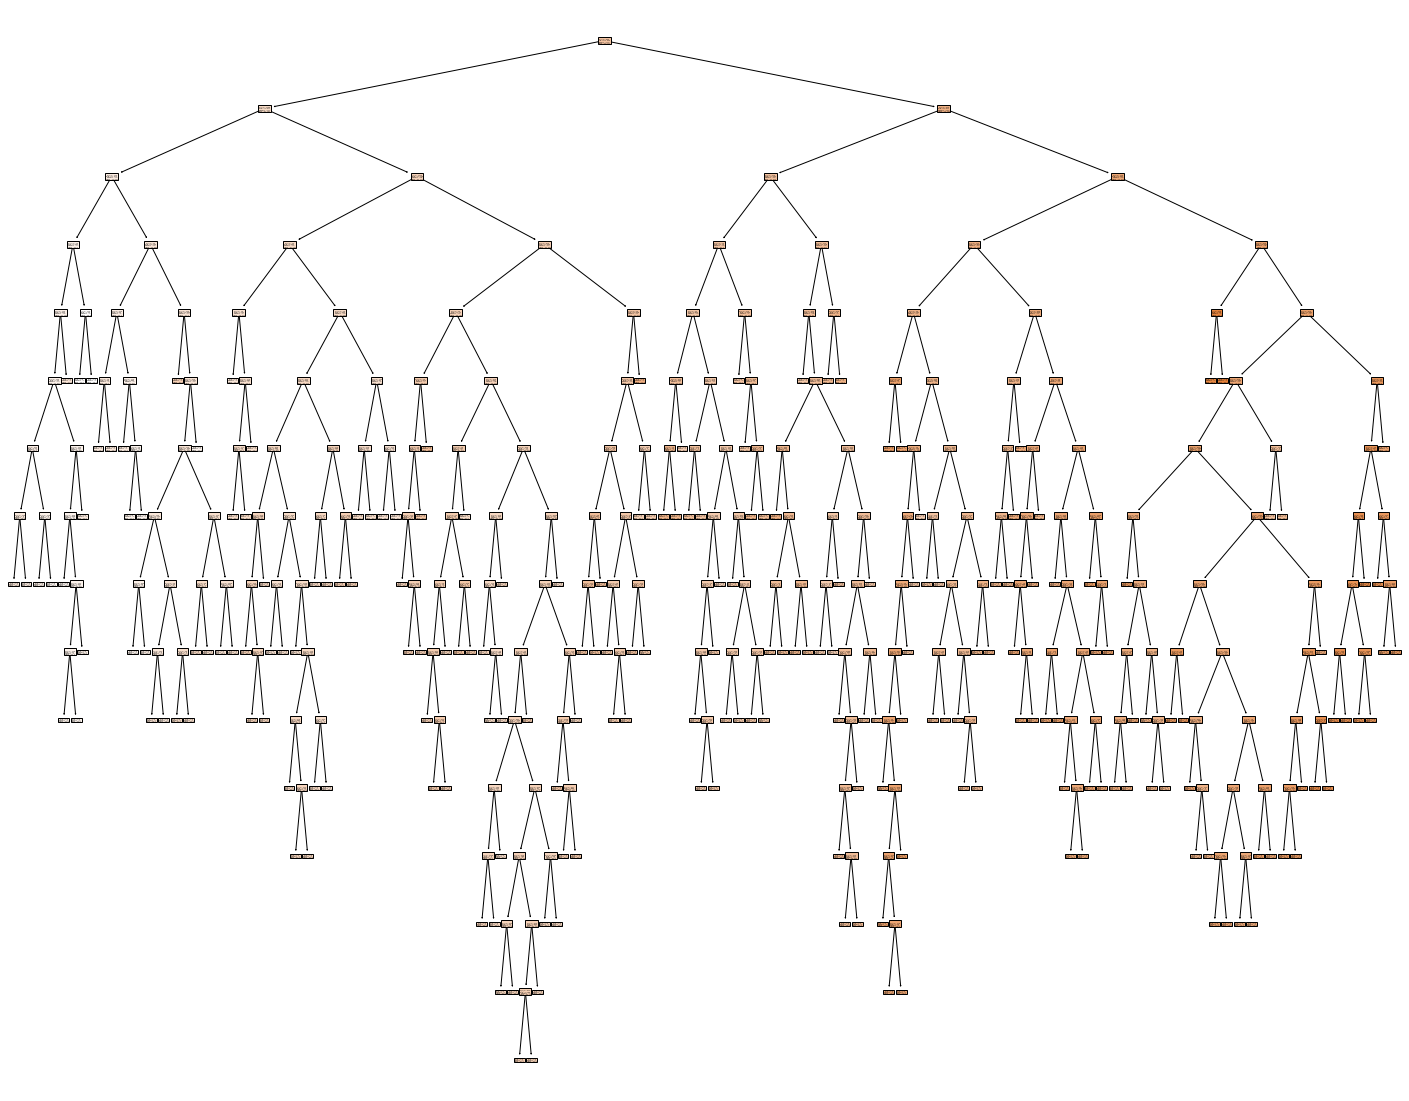

In [66]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rfc,  
                   class_names="actual",
                   filled=True)

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [67]:
dtr2 = DecisionTreeRegressor(max_depth=3)
dtr2.fit(X_train, y_train)
y_pred = dtr2.predict(X_test)

### 9. Vuelve a calcular si MAE

In [68]:
mae(y_test,y_pred)

0.07360307660891655

### 10. Vuelve a representar su árbol

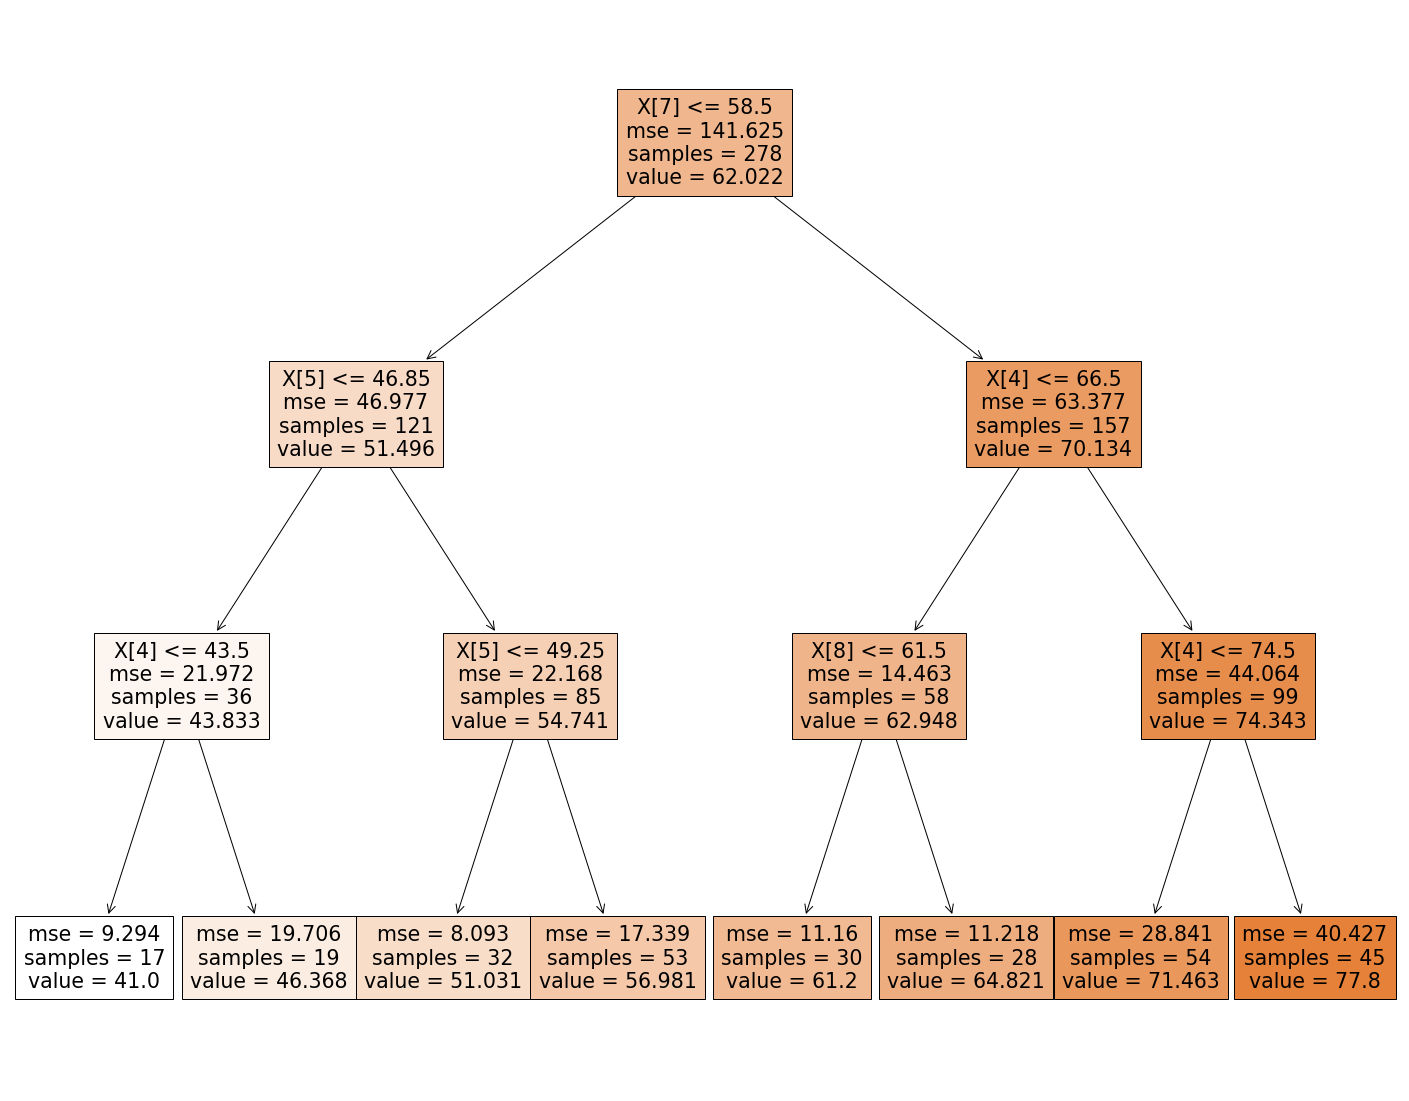

In [69]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr2,  
                   class_names="actual",
                   filled=True)

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [70]:
feature_list = list(df.columns)
# Get numerical feature importances
importances = list(dtr2.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: forecast_noaa        Importance: 0.70572
Variable: temp_1               Importance: 0.17818
Variable: average              Importance: 0.11046
Variable: forecast_acc         Importance: 0.00565
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: day                  Importance: 0.0
Variable: temp_2               Importance: 0.0
Variable: actual               Importance: 0.0
Variable: forecast_under       Importance: 0.0
Variable: friend               Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]